In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [4]:
hdulist = fits.open('../data/gll_iem_v02_P6_V11_DIFFUSE.fit')
hdulist.info()

Filename: ../data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [6]:
print(hdulist[0].header)
#length of 3rd axis : 30
#type of axis 3     : photon energy
#unit of axis 3     : Mev
#telescope name     : GLAST
#observer naem      : MICHELSON
que = ['len of 3rd axis','type of 3rd axis','unit of 3rd axis','telscope name','observer name']
ans = [30,'photon energy','Mev','GLAST','MICHELSON']



SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      BITPIX  =                  -32 /                                                NAXIS   =                    3 / number of data axes                            NAXIS1  =                  720 / length of data axis 1                          NAXIS2  =                  360 / length of data axis 2                          NAXIS3  =                   30 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H FLUX    =        8.42259635886 /                                                CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             CDELT1  =                  0.5 / Step size in longitude                         CRPIX1  =                360.5 / Pixel t

In [7]:
data = hdulist[0].data
data1 = data[0]
pix_max = np.max(data1)
pix_min = np.min(data1)
pix_std = np.std(data1)
print(pix_max, pix_min, pix_std)

4.5921523e-05 7.027717e-08 1.3843595e-06


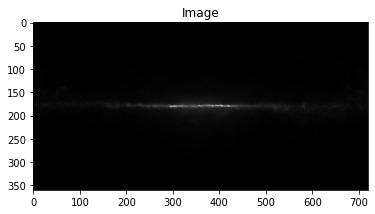

In [41]:
plt.title('Image')
plt.imshow(data1, vmax=pix_max, vmin=pix_min, cmap='gray')

1.0907543e-05 1.2774165e-08 3.5807247e-07


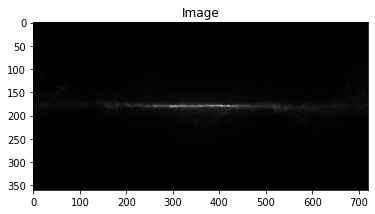

In [40]:
z = 30
new_data = data[4] + data[9] + data[14] + data[19] + data[24] + data[29]
new_pix_max = np.max(new_data)
new_pix_min = np.min(new_data)
new_pix_std = np.std(new_data)
print(new_pix_max, new_pix_min, new_pix_std)

plt.title('Image')
plt.imshow(new_data, vmax=new_pix_max, vmin=new_pix_min, cmap='gray')

In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)

In [52]:
def Altitude(coordinates,time):

    cur_time = []
    for i in range(13):
        cur_time.append(time+i*u.hour)

    deg = coordinates.transform_to(AltAz(obstime = cur_time ,location = iitm)).alt.deg

    times = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    
    plt.plot(times,deg)
    plt.title('Plot of Altitude')
    plt.ylabel('Altitude: (Degrees)')
    plt.xlabel('Hours after start time')
    

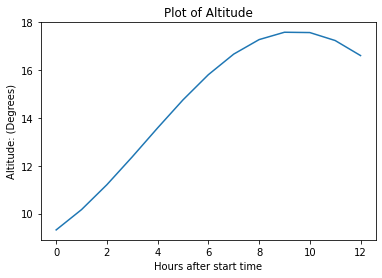

In [53]:
coord = SkyCoord(12.11 * u.deg, 85.26 * u.deg)
date_time = '2021-7-14 20:00:00'
init_time = Time(date_time)- (5.5) * u.hour
Altitude(coord, init_time)